In [7]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

%matplotlib inline

In [8]:
def loadtxt(file: Path) -> np.ndarray:
    if not file.exists():
        raise FileNotFoundError(f"File not found: {file}")
    return np.loadtxt(file)

def plot(ax: plt.Axes, dir: Path, filename:str, ylabel: str, case: str) -> None:
    y = loadtxt(dir / Path(filename))
    x = loadtxt(dir / Path("x.txt"))

    ax.plot(x, y, 'k.')
    ax.set_xlabel("x")
    ax.set_ylabel(ylabel)
    ax.set_title(case)

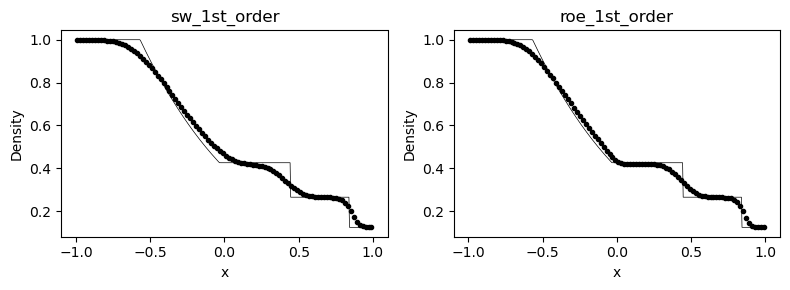

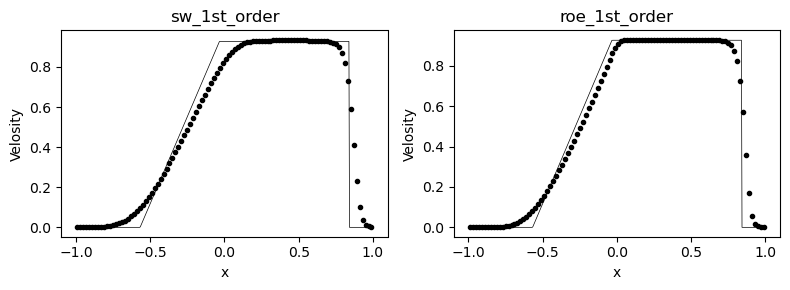

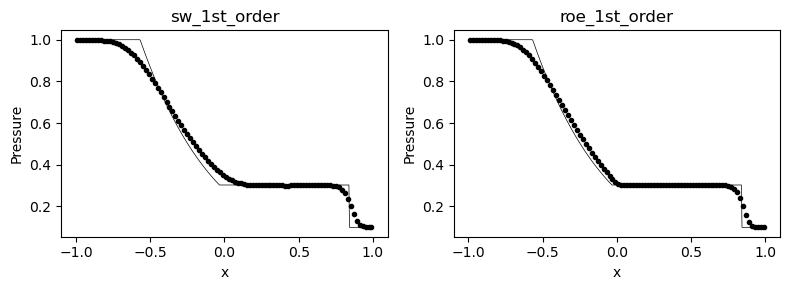

In [9]:
simulators = ["sw_1st_order", "roe_1st_order"]

rho = np.loadtxt("result/sw_1st_order/rho.txt")
u = np.loadtxt("result/sw_1st_order/u.txt")
p = np.loadtxt("result/sw_1st_order/p.txt")
x = np.linspace(-1, 1, 100)

rho_exact = np.loadtxt("exact_solution/rho.txt")
u_exact = np.loadtxt("exact_solution/u.txt")
p_exact = np.loadtxt("exact_solution/p.txt")
x_exact = np.loadtxt("exact_solution/x.txt")

fig1 = plt.figure(figsize=(8, 3))
for i, simulator in enumerate(simulators, 1):
    ax = fig1.add_subplot(1, 2, i)
    ax.plot(x_exact, rho_exact, 'k-', linewidth=0.5)
    plot(ax, Path(f"result/{simulator}"), "rho.txt", "Density", simulator)
fig1.tight_layout()

fig2 = plt.figure(figsize=(8, 3))
for i, simulator in enumerate(simulators, 1):
    ax = fig2.add_subplot(1, 2, i)
    ax.plot(x_exact, u_exact, 'k-', linewidth=0.5)
    plot(ax, Path(f"result/{simulator}"), "u.txt", "Velosity", simulator)
fig2.tight_layout()

fig3 = plt.figure(figsize=(8, 3))
for i, simulator in enumerate(simulators, 1):
    ax = fig3.add_subplot(1, 2, i)
    ax.plot(x_exact, p_exact, 'k-', linewidth=0.5)
    plot(ax, Path(f"result/{simulator}"), "p.txt", "Pressure", simulator)
fig3.tight_layout()